Installing nsepy library for colab.research.google.com 

In [1]:
!pip install nsepy

Importing all needed modules

In [0]:
from nsepy import get_history
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

Getting all Data From nsepy

In [0]:
tcs = get_history(symbol="TCS", start=date(2015,1,1), end=date(2016,12,31))
infy = get_history(symbol="INFY", start=date(2015,1,1), end=date(2016,12,31))
nifty = get_history(symbol="NIFTY IT", start=date(2015,1,1), end=date(2017,12,31), index=True)

For Removing holidays From Data

In [0]:
def holidays(df, start_d, end_d):
    idx = pd.date_range(start_d, end_d)
    df = df.reindex(idx, fill_value=0)
    df['Is_Holiday'] = df['Symbol'].apply(lambda x: 1 if(x==0) else 0)
    temp_d = 0
    in_p = int(df.shape[1]-1)
    for i in idx:
        if df.loc[i].Symbol != 0:
            temp_d = i
        else:
            df.loc[i,:in_p] = df.loc[temp_d]
    return df

For Moving Average

In [0]:
def moving_avg(df, week_list):
    for i in week_list:
        df['MA_'+str(i)] = df.Close.rolling(i*7).mean()
    return df

For Rolling Window

In [0]:
def roll_window(df, window_size_list):
    for i in window_size_list:
        df['roll_'+str(i)] = df.Close.shift(i)
    return df

Creating Dummy data

In [0]:
def create_dummy(df):
    df['Volume_Shift_1'] = df.Volume.shift(1)
    
    df['Volume_shocks'] = df.apply(lambda x: 0 if((x.Volume==1.1*x.Volume_Shift_1)or(x.Volume==0.9*x.Volume_Shift_1)) else 1, axis='columns')

    df['Volume_shocks_direction'] = df.apply(lambda x: 0 if(x.Volume>=x.Volume_Shift_1) else 1, axis='columns')
    
    df['Close_Shift_1'] = df.Close.shift(-1)

    df['Price_shocks'] = df.apply(lambda x: 0 if(abs(x.Close-x.Close_Shift_1)>0.02*x.Close) else 1, axis='columns')

    df['Price_shocks_direction'] = df.apply(lambda x: 0 if(x.Close<x.Close_Shift_1) else 1, axis='columns')
    
    df['Pricing_black_swan'] = df.apply(lambda x: 0 if(abs(x.Close-x.Close_Shift_1)>0.02*x.Close) else 1, axis='columns')

    df['Pricing_black_swan_direction'] = df.apply(lambda x: 0 if(x.Close<x.Close_Shift_1) else 1, axis='columns')
    
    df['Pricing_shock_without_volume_shock'] = df.apply(lambda x: 1 if(x.Volume_shocks==0 and x.Price_shocks==1) else 0, axis='columns')
    return df

Data Cleaning 

In [0]:
nifty['Symbol'] = 'NIFTY IT'
infy = holidays(infy, date(2015,1,1), date(2016,12,31))
tcs = holidays(tcs, date(2015,1,1), date(2016,12,31))
nifty = holidays(nifty, date(2015,1,1), date(2016,12,31))


Moving Average

In [0]:
weeks = [4,16,28,40,52]
infy_ma = moving_avg(infy.loc[:,('Is_Holiday','Close')], weeks)
tcs_ma = moving_avg(tcs.loc[:,('Is_Holiday','Close')], weeks)
nifty_ma = moving_avg(nifty.loc[:,('Is_Holiday','Close')], weeks)

Plotting Graph for Infy

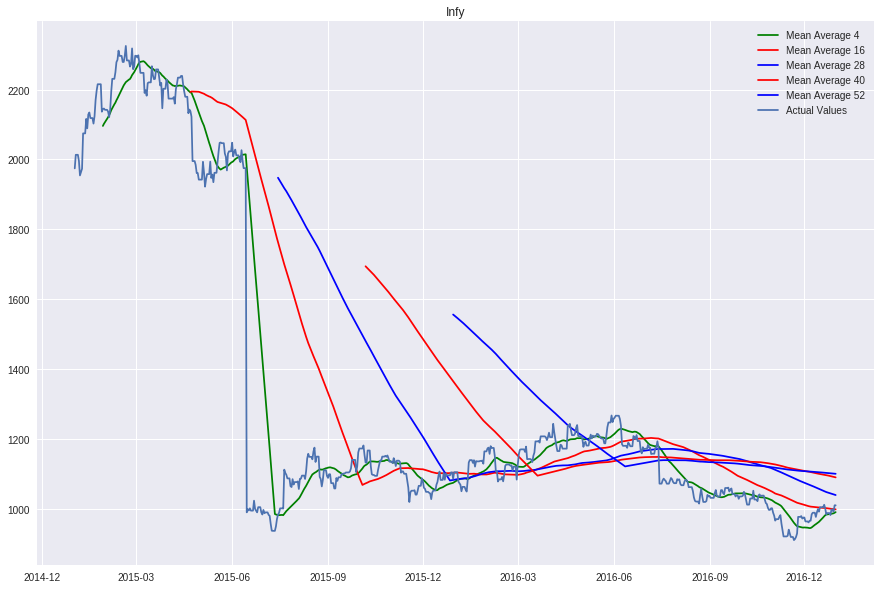

In [10]:
plt.figure(figsize = (15, 10))
plt.title('Infy')
plt.plot(infy_ma['MA_4'], 'g', label = 'Mean Average 4')
plt.plot(infy_ma['MA_16'], 'r', label = 'Mean Average 16')
plt.plot(infy_ma['MA_28'], 'b', label = 'Mean Average 28')
plt.plot(infy_ma['MA_40'], 'r', label = 'Mean Average 40')
plt.plot(infy_ma['MA_52'], 'b', label = 'Mean Average 52')
plt.plot(infy_ma['Close'], label = 'Actual Values')
plt.legend(loc = 'upper right')

Plotting Graph for TCS

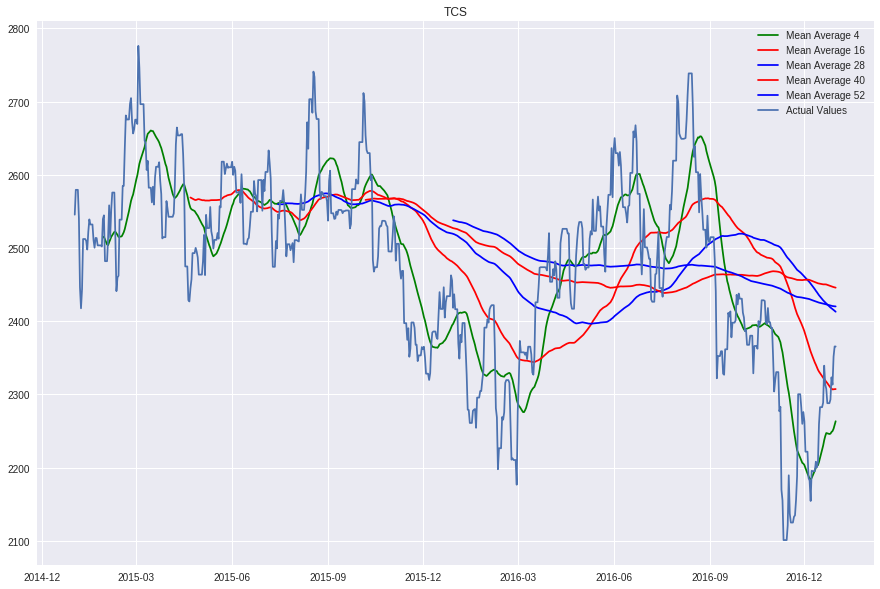

In [11]:
plt.figure(figsize = (15, 10))
plt.title('TCS')
plt.plot(tcs_ma['MA_4'], 'g', label = 'Mean Average 4')
plt.plot(tcs_ma['MA_16'], 'r', label = 'Mean Average 16')
plt.plot(tcs_ma['MA_28'], 'b', label = 'Mean Average 28')
plt.plot(tcs_ma['MA_40'], 'r', label = 'Mean Average 40')
plt.plot(tcs_ma['MA_52'], 'b', label = 'Mean Average 52')
plt.plot(tcs_ma['Close'], label = 'Actual Values')
plt.legend(loc = 'upper right')

Plotting Graph for Nifty

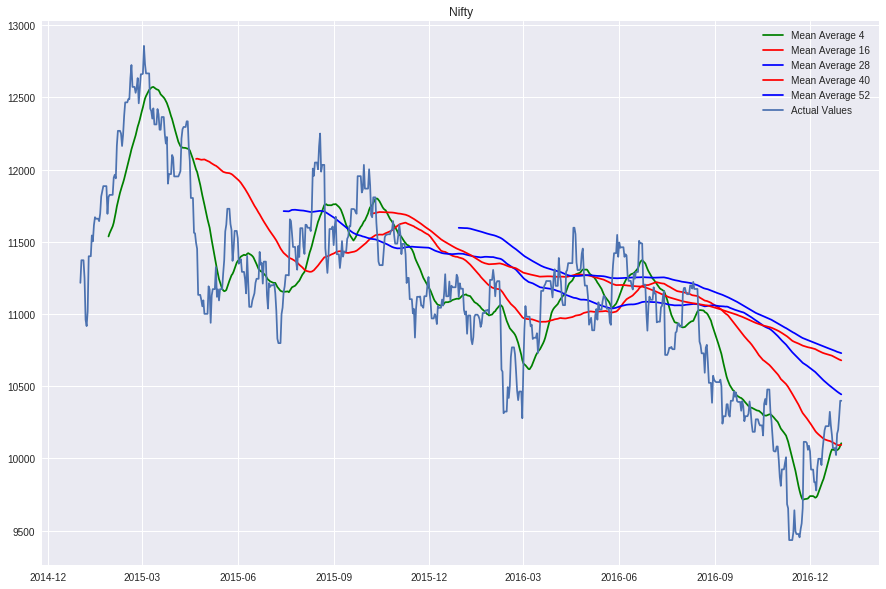

In [12]:
plt.figure(figsize = (15, 10))
plt.title('Nifty')
plt.plot(nifty_ma['MA_4'], 'g', label = 'Mean Average 4')
plt.plot(nifty_ma['MA_16'], 'r', label = 'Mean Average 16')
plt.plot(nifty_ma['MA_28'], 'b', label = 'Mean Average 28')
plt.plot(nifty_ma['MA_40'], 'r', label = 'Mean Average 40')
plt.plot(nifty_ma['MA_52'], 'b', label = 'Mean Average 52')
plt.plot(nifty_ma['Close'], label = 'Actual Values')
plt.legend(loc = 'upper right')

Roll Window

In [0]:

# roll window
window_size = [10,20,30,40,50,60,70,75]
infy_rw = roll_window(infy.loc[:,('Is_Holiday','Close')],window_size)
tcs_rw = roll_window(tcs.loc[:,('Is_Holiday','Close')],window_size)
nifty_rw = roll_window(nifty.loc[:,('Is_Holiday','Close')],window_size)

Plotting Graph for Infy

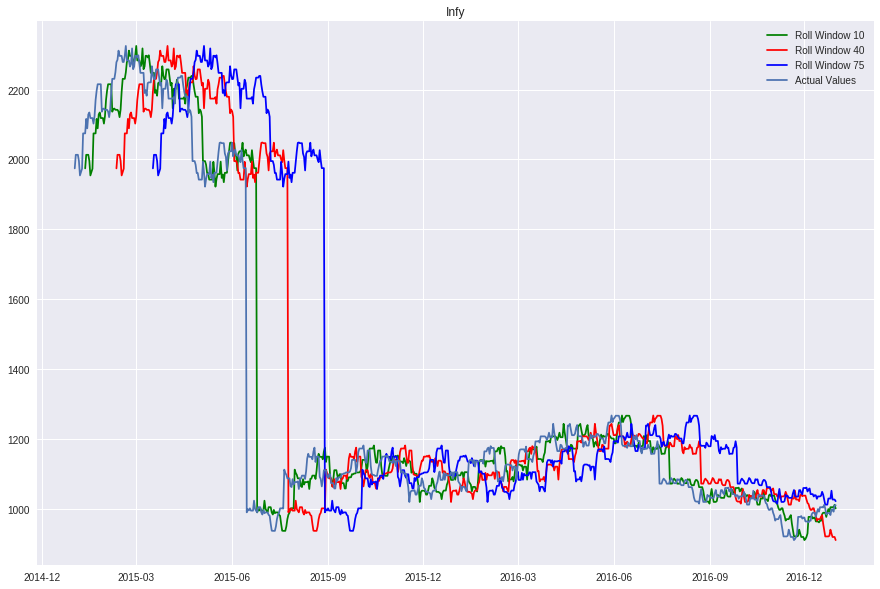

In [14]:
plt.figure(figsize = (15, 10))
plt.title('Infy')
plt.plot(infy_rw['roll_10'], 'g', label = 'Roll Window 10')
plt.plot(infy_rw['roll_40'], 'r', label = 'Roll Window 40')
plt.plot(infy_rw['roll_75'], 'b', label = 'Roll Window 75')
plt.plot(infy_ma['Close'], label = 'Actual Values')
plt.legend(loc = 'upper right')

Plotting Graph for TCS

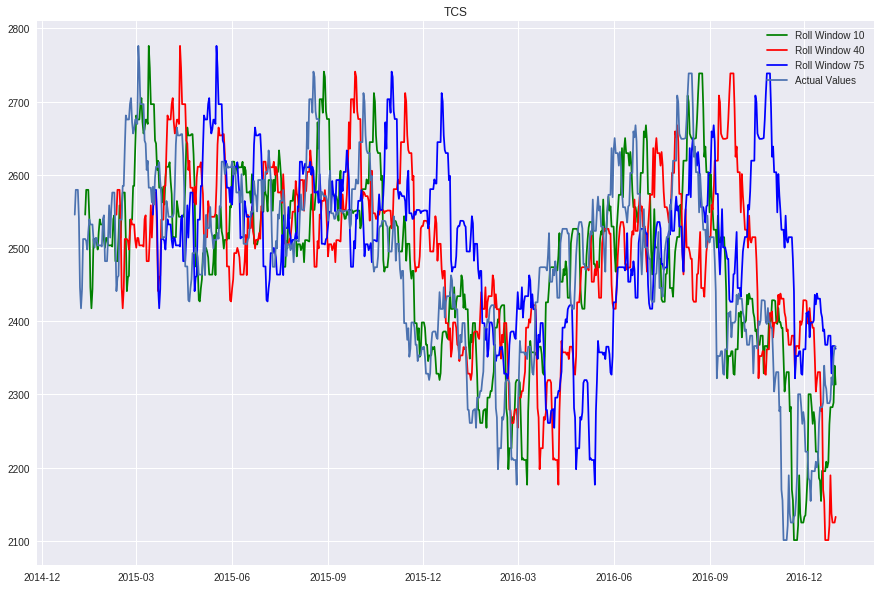

In [15]:
plt.figure(figsize = (15, 10))
plt.title('TCS')
plt.plot(tcs_rw['roll_10'], 'g', label = 'Roll Window 10')
plt.plot(tcs_rw['roll_40'], 'r', label = 'Roll Window 40')
plt.plot(tcs_rw['roll_75'], 'b', label = 'Roll Window 75')
plt.plot(tcs_rw['Close'], label = 'Actual Values')
plt.legend(loc = 'upper right')

Plotting Graph for Nifty

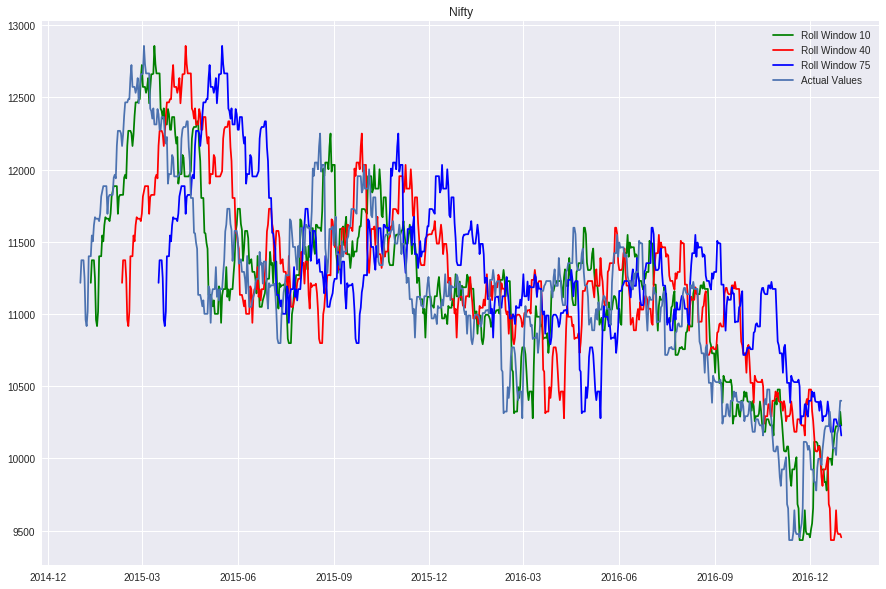

In [16]:
plt.figure(figsize = (15, 10))
plt.title('Nifty')
plt.plot(nifty_rw['roll_10'], 'g', label = 'Roll Window 10')
plt.plot(nifty_rw['roll_40'], 'r', label = 'Roll Window 40')
plt.plot(nifty_rw['roll_75'], 'b', label = 'Roll Window 75')
plt.plot(nifty_rw['Close'], label = 'Actual Values')
plt.legend(loc = 'upper right')

Creating  Dummy Data

In [0]:
infy_dummy = create_dummy(infy.loc[:,('Volume','Close')])
tcs_dummy = create_dummy(tcs.loc[:,('Volume','Close')])
nifty_dummy = create_dummy(nifty.loc[:,('Volume','Close')])

Plotting autocorrelation for Infy

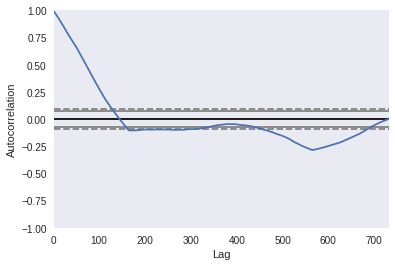

In [18]:
pd.plotting.autocorrelation_plot(infy.Close);

Plotting autocorrelation for TCS

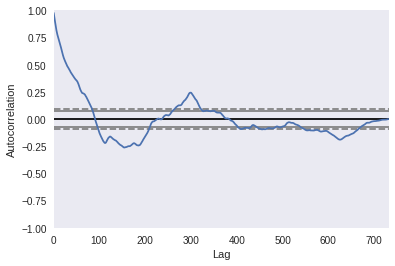

In [19]:
pd.plotting.autocorrelation_plot(tcs.Close);

Plotting autocorrelation for Nify

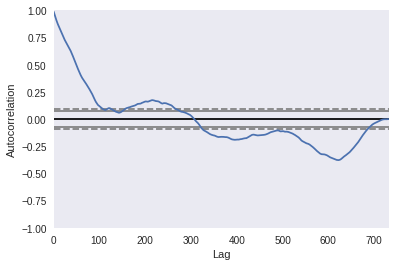

In [20]:
pd.plotting.autocorrelation_plot(nifty.Close);

***Sklearn***

In [21]:
timesteps = 183
X_train = []
y_train = []
for i in range(timesteps, len(tcs.Close) - 1):
    X_train.append(tcs.Close[i - timesteps:i])
    y_train.append(tcs.Close[i])
X_train, y_train = np.array(X_train), np.array(y_train)

Test_data_tcs = get_history(symbol='TCS',
                             start=date(2018, 6, 1),
                             end=date(2018, 12, 1))

X_test = []
y_test = []
for i in range(timesteps, len(Test_data_tcs.Close.values) - 1):
    X_train.append(Test_data_tcs.Close.values[i - timesteps:i])
    y_train.append(Test_data_tcs.Close.values[i])
X_test, y_test = np.array(X_train), np.array(y_train)

rdg_tcs = Ridge()
rdg_tcs.fit(X_train, y_train)

y_rid_pred = rdg_tcs.predict(X_test)
acc1 = rdg_tcs.score(X_test,y_test)
print(acc1)



linreg_tcs=LinearRegression()
linreg_tcs.fit(X_train,y_train)
acc2 = linreg_tcs.score(X_test,y_test)
print(acc2)

0.9714779878531832
0.9714779878567408


In [22]:
timesteps = 183
X_train = []
y_train = []
for i in range(timesteps, len(infy.Close) - 1):
    X_train.append(infy.Close[i - timesteps:i])
    y_train.append(infy.Close[i])
X_train, y_train = np.array(X_train), np.array(y_train)

Test_data_infy = get_history(symbol='INFY',
                             start=date(2018, 6, 1),
                             end=date(2018, 12, 1))

X_test = []
y_test = []
for i in range(timesteps, len(Test_data_infy.Close.values) - 1):
    X_train.append(Test_data_infy.Close.values[i - timesteps:i])
    y_train.append(Test_data_infy.Close.values[i])
X_test, y_test = np.array(X_train), np.array(y_train)

rdg_infy = Ridge()
rdg_infy.fit(X_train, y_train)

y_rid_pred = rdg_infy.predict(X_test)
acc1 = rdg_infy.score(X_test,y_test)
print(acc1)



linreg_infy=LinearRegression()
linreg_infy.fit(X_train,y_train)
acc2 = linreg_infy.score(X_test,y_test)
print(acc2)

0.979718310417839
0.9797183104250001


In [23]:
timesteps = 183
X_train = []
y_train = []
for i in range(timesteps, len(nifty.Close) - 1):
    X_train.append(nifty.Close[i - timesteps:i])
    y_train.append(nifty.Close[i])
X_train, y_train = np.array(X_train), np.array(y_train)

Test_data_nifty = get_history(symbol='NIFTY IT',
                             start=date(2018, 6, 1),
                             end=date(2018, 12, 1))

X_test = []
y_test = []
for i in range(timesteps, len(Test_data_nifty.Close.values) - 1):
    X_train.append(Test_data_nifty.Close.values[i - timesteps:i])
    y_train.append(Test_data_nifty.Close.values[i])
X_test, y_test = np.array(X_train), np.array(y_train)

rdg_nifty = Ridge()
rdg_nifty.fit(X_train, y_train)

y_rid_pred = rdg_nifty.predict(X_test)
acc1 = rdg_nifty.score(X_test,y_test)
print(acc1)



linreg_nifty=LinearRegression()
linreg_nifty.fit(X_train,y_train)
acc2 = linreg_nifty.score(X_test,y_test)
print(acc2)

0.978916236620265
0.9789162366202738
